In [ ]:
import tensorflow as tf
import numpy as np
import math
import os
import scipy.io as sio
import matplotlib.pyplot as plt
from tqdm import tqdm
from fastprogress import master_bar, progress_bar

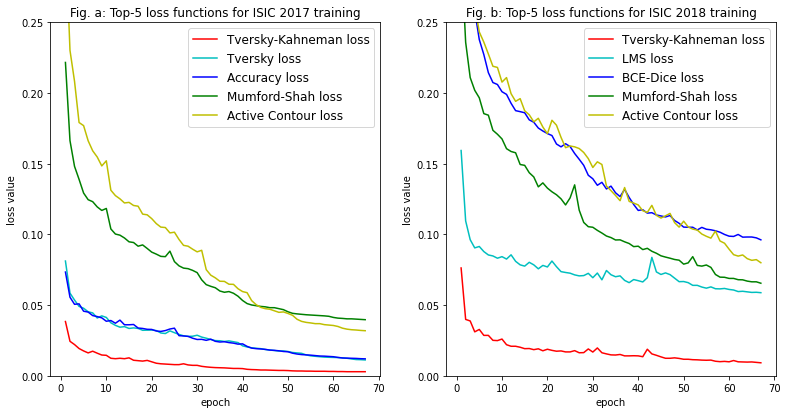

In [14]:
import numpy as np
from matplotlib import pyplot as plt

#2017
x=[1,2,3,4,5,6,7,8,9,10,
   11,12,13,14,15,16,17,18,19,20,
   21,22,23,24,25,26,27,28,29,30,
   31,32,33,34,35,36,37,38,39,40,
   41,42,43,44,45,46,47,48,49,50,
   51,52,53,54,55,56,57,58,59,60,
   61,62,63,64,65,66,67]

y1_TK=[0.0384,0.0244,0.0221,0.0193,0.0176,0.0162,0.0174,0.0160,0.0147,0.0145,
       0.0124,0.0121,0.0124,0.0121,0.0127,0.0110,0.0107,0.0104,0.0109,0.0099,
       0.0089,0.0085,0.0083,0.0081,0.0079,0.0079,0.0085,0.0077,0.0074,0.0074,
       0.0067,0.0063,0.0060,0.0058,0.0057,0.0056,0.0054,0.0052,0.0052,0.0051,
       0.0046,0.0044,0.0043,0.0041,0.0041,0.0040,0.0039,0.0038,0.0038,0.0037,
       0.0035,0.0034,0.0034,0.0033,0.0033,0.0032,0.0032,0.0032,0.0031,0.0031,
       0.0030,0.0030,0.0029,0.0029,0.0029,0.0029,0.0029]
y1_Tver=[0.0812,0.0585,0.0536,0.0491,0.0478,0.0453,0.0445,0.0409,0.0424,0.0413,
         0.0375,0.0357,0.0344,0.0348,0.0335,0.0339,0.0335,0.0322,0.0323,0.0324,
         0.0320,0.0303,0.0299,0.0318,0.0305,0.0293,0.0283,0.0279,0.0280,0.0287,
         0.0274,0.0266,0.0257,0.0249,0.0248,0.0243,0.0247,0.0241,0.0235,0.0212,
         0.0204,0.0198,0.0195,0.0192,0.0186,0.0182,0.0179,0.0175,0.0176,0.0172,
         0.0165,0.0162,0.0159,0.0148,0.0141,0.0138,0.0135,0.0132,0.0131,0.0130,
         0.0129,0.0127,0.0124,0.0119,0.0115,0.0114,0.0112]
y1_acc=[0.0734,0.0556,0.0506,0.0509,0.0457,0.0451,0.0426,0.0419,0.0410,0.0386,
        0.0391,0.0372,0.0394,0.0361,0.0361,0.0363,0.0338,0.0335,0.0329,0.0328,
        0.0317,0.0314,0.0320,0.0331,0.0337,0.0284,0.0282,0.0279,0.0266,0.0257,
        0.0258,0.0251,0.0259,0.0244,0.0239,0.0241,0.0235,0.0231,0.0224,0.0226,
        0.0208,0.0196,0.0192,0.0190,0.0187,0.0182,0.0180,0.0177,0.0172,0.0170,
        0.0160,0.0154,0.0150,0.0148,0.0146,0.0143,0.0140,0.0139,0.0137,0.0135,
        0.0130,0.0126,0.0125,0.0124,0.0123,0.0121,0.0120]
y1_mfs=[0.2217,0.1664,0.1482,0.1390,0.1293,0.1246,0.1232,0.1195,0.1170,0.1184,
        0.1039,0.1003,0.0995,0.0975,0.0948,0.0943,0.0917,0.0926,0.0901,0.0875,
        0.0861,0.0845,0.0843,0.0882,0.0808,0.0778,0.0762,0.0758,0.0746,0.0730,
        0.0679,0.0645,0.0633,0.0623,0.0600,0.0591,0.0596,0.0584,0.0563,0.0533,
        0.0511,0.0501,0.0496,0.0491,0.0488,0.0482,0.0482,0.0475,0.0468,0.0453,
        0.0442,0.0438,0.0435,0.0432,0.0430,0.0428,0.0426,0.0424,0.0421,0.0413,
        0.0408,0.0406,0.0403,0.0403,0.0401,0.0399,0.0397]
y1_active=[0.3123,0.2303,0.2084,0.1792,0.1770,0.1663,0.1592,0.1548,0.1485,0.1521,
           0.1313,0.1275,0.1252,0.1223,0.1227,0.1205,0.1200,0.1144,0.1139,0.1112,
           0.1077,0.1052,0.1049,0.1011,0.1016,0.0965,0.0923,0.0917,0.0896,0.0877,
           0.0888,0.0751,0.0712,0.0693,0.0669,0.0668,0.0648,0.0647,0.0616,0.0596,
           0.0588,0.0532,0.0503,0.0484,0.0475,0.0471,0.0460,0.0449,0.0452,0.0441,
           0.0428,0.0400,0.0385,0.0378,0.0374,0.0369,0.0369,0.0362,0.0359,0.0356,
           0.0349,0.0337,0.0330,0.0326,0.0324,0.0321,0.0319]

#2018
y2_TK=[0.0763,0.0399,0.0388,0.0311,0.0328,0.0286,0.0286,0.0251,0.0249,0.0260,
       0.0220,0.0209,0.0209,0.0202,0.0192,0.0193,0.0185,0.0191,0.0177,0.0188,
       0.0180,0.0174,0.0176,0.0169,0.0169,0.0178,0.0163,0.0164,0.0190,0.0168,
       0.0197,0.0163,0.0155,0.0148,0.0147,0.0151,0.0141,0.0141,0.0142,0.0141,
       0.0135,0.0188,0.0155,0.0145,0.0134,0.0124,0.0124,0.0127,0.0123,0.0117,
       0.0117,0.0114,0.0113,0.0111,0.0110,0.0111,0.0103,0.0100,0.0102,0.0099,
       0.0108,0.0099,0.0098,0.0097,0.0098,0.0095,0.0092]
y2_lms=[0.1594,0.1096,0.0963,0.0905,0.0915,0.0879,0.0855,0.0848,0.0832,0.0843,
        0.0826,0.0856,0.0810,0.0785,0.0776,0.0803,0.0785,0.0757,0.0781,0.0770,
        0.0812,0.0772,0.0737,0.0731,0.0726,0.0714,0.0707,0.0709,0.0725,0.0694,
        0.0727,0.0679,0.0745,0.0715,0.0701,0.0707,0.0675,0.0659,0.0681,0.0673,
        0.0664,0.0694,0.0838,0.0735,0.0717,0.0728,0.0716,0.0691,0.0666,0.0667,
        0.0659,0.0640,0.0640,0.0628,0.0620,0.0629,0.0616,0.0615,0.0618,0.0611,
        0.0607,0.0596,0.0598,0.0594,0.0590,0.0591,0.0588]
y2_active=[0.4028,0.3044,0.2746,0.2624,0.2433,0.2361,0.2277,0.2190,0.2182,0.2078,
           0.2110,0.1996,0.1942,0.1961,0.1875,0.1847,0.1797,0.1822,0.1760,0.1713,
           0.1808,0.1773,0.1687,0.1614,0.1626,0.1620,0.1608,0.1580,0.1537,0.1474,
           0.1514,0.1495,0.1343,0.1310,0.1276,0.1239,0.1332,0.1234,0.1222,0.1209,
           0.1168,0.1156,0.1206,0.1135,0.1116,0.1132,0.1149,0.1084,0.1052,0.1094,
           0.1053,0.1038,0.1031,0.1003,0.0987,0.0974,0.1024,0.0954,0.0938,0.0896,
           0.0857,0.0847,0.0855,0.0829,0.0817,0.0822,0.0800]
y2_mfs=[0.3011,0.2360,0.2110,0.2020,0.1967,0.1855,0.1844,0.1737,0.1709,0.1676,
        0.1607,0.1587,0.1578,0.1495,0.1489,0.1437,0.1407,0.1337,0.1365,0.1328,
        0.1302,0.1281,0.1252,0.1209,0.1259,0.1351,0.1172,0.1085,0.1055,0.1051,
        0.1029,0.1010,0.0989,0.0978,0.0961,0.0962,0.0948,0.0936,0.0914,0.0917,
        0.0893,0.0902,0.0881,0.0867,0.0849,0.0840,0.0832,0.0823,0.0818,0.0790,
        0.0799,0.0843,0.0781,0.0776,0.0784,0.0767,0.0717,0.0698,0.0697,0.0689,
        0.0689,0.0680,0.0679,0.0670,0.0665,0.0665,0.0655]
y2_bcedice=[0.4065,0.2993,0.2689,0.2583,0.2379,0.2273,0.2145,0.2075,0.2061,0.2010,
            0.1991,0.1928,0.1876,0.1869,0.1861,0.1811,0.1794,0.1753,0.1732,0.1714,
            0.1700,0.1640,0.1620,0.1642,0.1622,0.1573,0.1532,0.1489,0.1419,0.1394,
            0.1348,0.1369,0.1322,0.1342,0.1295,0.1268,0.1319,0.1262,0.1212,0.1170,
            0.1175,0.1151,0.1154,0.1138,0.1131,0.1124,0.1134,0.1099,0.1079,0.1052,
            0.1051,0.1051,0.1032,0.1050,0.1037,0.1033,0.1026,0.1016,0.1000,0.0988,
            0.0986,0.1000,0.0981,0.0982,0.0982,0.0976,0.0962]
# The third argument to plot describes the curve.
# o means that there should be dots for the data values
# - (single dash) means that there should be a connecting line
# As can be seen, these options can be combined.

fig = plt.figure(figsize=(13, 6.5))
plt1 = fig.add_subplot(121)
plt2 = fig.add_subplot(122)

plt1.set_xlabel('epoch')
plt1.set_ylabel('loss value')
plt1.set_ylim([0,0.25])
plt1.set_title('Fig. a: Top-5 loss functions for ISIC 2017 training')
plt2.set_xlabel('epoch')
plt2.set_ylabel('loss value')
plt2.set_ylim([0,0.25])
plt2.set_title('Fig. b: Top-5 loss functions for ISIC 2018 training')

plt1.plot(x, y1_TK, '-r', label='Tversky-Kahneman loss')
plt1.plot(x, y1_Tver, '-c', label='Tversky loss')
plt1.plot(x, y1_acc, '-b', label='Accuracy loss')
plt1.plot(x, y1_mfs, '-g', label='Mumford-Shah loss')
plt1.plot(x, y1_active, '-y', label='Active Contour loss')

plt2.plot(x, y2_TK, '-r', label='Tversky-Kahneman loss')
plt2.plot(x, y2_lms, '-c', label='LMS loss')
plt2.plot(x, y2_bcedice, '-b', label='BCE-Dice loss')
plt2.plot(x, y2_mfs, '-g', label='Mumford-Shah loss')
plt2.plot(x, y2_active, '-y', label='Active Contour loss')

plt1.legend(loc=1, prop={'size': 12})
plt2.legend(loc=1, prop={'size': 12})
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


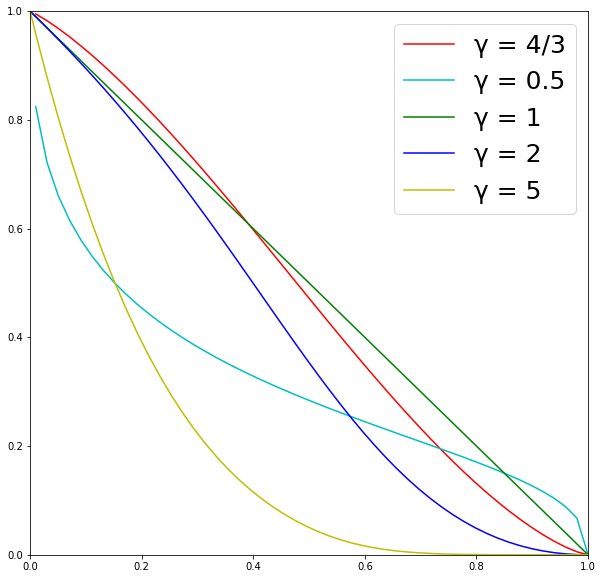

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

t = np.linspace(-1, 1, 100)
a = pow(1-t,4/3)/pow(pow(t,4/3) + pow(1-t,4/3),3/4) #((1-t)^(4/3))/((t^(4/3)+(1-t)^(4/3))^(3/4))
b = pow(1-t,0.5)/pow(pow(t,0.5) + pow(1-t,0.2),2) #((1-t)^(0.1))/((t^(0.1)+(1-t)^(0.1))^(10))
c = pow(1-t,1)/pow(pow(t,1) + pow(1-t,1),1) #((1-t)^(1))/((t^(1)+(1-t)^(1))^(1))
d = pow(1-t,2)/pow(pow(t,2) + pow(1-t,2),1/2) #((1-t)^(2))/((t^(2)+(1-t)^(2))^(1/2))
e = pow(1-t,5)/pow(pow(t,5) + pow(1-t,4),1/5) #((1-t)^(3))/((t^(3)+(1-t)^(3))^(1/3))

ax.plot(t, a, 'r', label='γ = 4/3') 
ax.plot(t, b, 'c', label='γ = 0.5') 
ax.plot(t, c, 'g', label='γ = 1') 
ax.plot(t, d, 'b', label='γ = 2') 
ax.plot(t, e, 'y', label='γ = 5') 

plt.xlim([0,1])
plt.ylim([0,1])

plt.legend(loc=1, prop={'size': 25})
plt.show()

In [ ]:
'''
import glob
import os

for name in glob.glob('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/Dataset/isic2017/ISIC-2017_Training_Data/*.csv'):
  os.remove(name)
'''

In [ ]:
def get_efficient_unet_vs2(input, encoder1, encoder2, out_channels=2, block_type='upsampling', concat_input=True):
    MBConvBlocks1 = []
    MBConvBlocks2 = []
    #lay cac skip connection tu encoder
    skip_candidates1 = get_blocknr_of_skip_candidates(encoder1)
    skip_candidates2 = get_blocknr_of_skip_candidates(encoder2)

    for mbblock_nr1 in skip_candidates1:
        mbblock1 = encoder1.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr1)).output
        MBConvBlocks1.append(mbblock1)

    for mbblock_nr2 in skip_candidates2:
        mbblock2 = encoder2.get_layer('blocks_{}_output_batch_norm'.format(mbblock_nr2)).output
        MBConvBlocks2.append(mbblock2)

    # delete the last block since it won't be used in the process of concatenation
    MBConvBlocks1.pop()
    MBConvBlocks2.pop()

    input1 = encoder1.input
    head1 = encoder1.get_layer('head_swish').output
    blocks1 = [input1] + MBConvBlocks1 + [head1]
    input2 = encoder2.input
    head2 = encoder2.get_layer('head_swish').output
    blocks2 = [input2] + MBConvBlocks2 + [head2]
    #define decoder block
    UpBlock = Conv2DTranspose_block1
    
    #build decoder with double skip connection
    o = Concatenate()([blocks1.pop(), blocks2.pop()])
    o = BottleNeck1()(o)
    o = UpBlock(512, skip1=blocks1.pop(), skip2=blocks2.pop())(o)

    o = UpBlock(256, skip1=blocks1.pop(), skip2=blocks2.pop())(o)


    o = UpBlock(128, skip1=blocks1.pop(), skip2=blocks2.pop())(o)

    o = UpBlock(64,  skip1=blocks1.pop(), skip2=blocks2.pop())(o)

    if concat_input:
        o = UpBlock(32, skip1=blocks1.pop(), skip2=blocks2.pop())(o)
    else:
        o = UpBlock(32)(o)
    o = Conv2D(3, (1, 1), padding='same', kernel_initializer=conv_kernel_initializer,use_bias=False)(o)
    o = BatchNormalization()(o)
    o = LeakyReLU(0.2)(o)
    o = Conv2D(out_channels,(1, 1), padding='same',activation='sigmoid')(o)
    model = models.Model(input, o)

    return model, o

In [ ]:
def Generator(shape=(192,288,3)):
  input_encoder1 = Input(shape)

  encoder1, output_encoder1 = get_efficientnet_b1_encoder(input_shape=(192,288,3), pretrained=True)
  #output_encoder1 = ASPP(output_encoder1, 128) #BottleNeck
  decoder1, output_decoder1 = get_efficient_unet_vs1(encoder1, out_channels=1, block_type='transpose', concat_input=True) 
  print('output_decoder1: ', output_decoder1.shape)

  input_encoder2 = input_encoder1*output_decoder1
  print('input_encoder2: ', input_encoder2.shape)

  encoder2, output_encoder2 = get_efficientnet_b0_encoder(input_shape=(192,288,3), pretrained=True)
  #output_encoder2 = ASPP(output_encoder2, 128) #BottleNeck
  decoder2, output_decoder2 = get_efficient_unet_vs2(output_encoder2, encoder1, encoder2, out_channels=1, block_type='transpose', concat_input=True)

  output_decoder2 = Concatenate()([output_decoder1, output_decoder2])
  model = Model(input_encoder1, output_decoder2)
  return model

In [ ]:
def dropout(x, p):
  return Dropout(p)(x)

def bnorm(x):
  return BatchNormalization()(x)

def relu(x):
  return Activation('relu')(x)

def conv_l1(x, nb_filters, kernel, stride=(1, 1)):
  return Convolution2D(nb_filters, kernel, padding='same', kernel_initializer='he_uniform', kernel_regularizer=l1(0.01), strides=(stride, stride))(x)

def convl1_lrelu(x, nb_filters, kernel, stride):
  x = conv_l1(x, nb_filters, kernel, stride)
  return LeakyReLU()(x)

def convl1_bn_lrelu(x, nb_filters, kernel, stride):
  x = conv_l1(x, nb_filters, kernel, stride)
  x = bnorm(x)
  return LeakyReLU()(x)

def shared_convl1_lrelu(shape, nb_filters, kernel, stride=(1, 1), **kwargs):
  # i = Input(shape)
  c = Convolution2D(nb_filters, kernel, padding='same', kernel_initializer='he_uniform', kernel_regularizer=l1(0.01), strides=(stride, stride), input_shape=shape)
  l = LeakyReLU()
  return Sequential([c, l], **kwargs)

def shared_convl1_bn_lrelu(shape, nb_filters, kernel, stride=(1, 1), **kwargs):
  c = Convolution2D(nb_filters, kernel, padding='same', kernel_initializer='he_uniform', kernel_regularizer=l1(0.01), strides=(stride, stride), input_shape=shape)
  b = BatchNormalization()
  l = LeakyReLU()
  return Sequential([c, b, l], **kwargs)

def upsampl_block(x, nb_filters, kernel, stride, size):
  x = UpSampling2D(size=size)(x)
  x = conv_l1(x, nb_filters, kernel, stride)
  x = bnorm(x)
  return relu(x)

def upsampl_conv(x, nb_filters, kernel, stride, size):
  x = UpSampling2D(size=size)(x)
  return conv_l1(x, nb_filters, kernel, stride)

def upsampl_softmax(x, nb_filters, kernel, stride, size, max_project=True):
  x = UpSampling2D(size=size)(x)
  x = conv_l1(x, nb_filters, kernel, stride)
  x = Lambda(hidim_softmax, name='softmax')(x)
  if max_project:
    x = Lambda(lambda x: K.max(x, axis=-1, keepdims=True), name='MaxProject')(x)
  return x

def level_block(previous_block, nb_filters, depth, filter_inc_rate, p):
  print('Current level block depth {}'.format(depth))
  # curr_block = previous_block
  curr_block = convl1_bn_lrelu(previous_block, nb_filters, 4, 2)
  print('Shape prev {}, shape curr {} and depth {} before recursion'.format(previous_block.shape, curr_block.shape, depth))
  curr_block = dropout(curr_block, p) if p else curr_block
  if depth > 0:  # Call next recursion level
    curr_block = level_block(curr_block, int(filter_inc_rate * nb_filters), depth - 1, filter_inc_rate, p)
  print('Shape prev {}, shape curr {} and depth {} after recursion'.format(previous_block.shape, curr_block.shape, depth))
  curr_block = upsampl_block(curr_block, nb_filters, 3, 1, 2)
  print('Shape prev {}, shape curr {} and depth {} after upsampling'.format(previous_block.shape, curr_block.shape, depth))
  curr_block = Concatenate(axis=3)([curr_block, previous_block])
  print('Shape curr {} and depth {} before return'.format(curr_block.shape, depth))
  return curr_block

def hidim_softmax(x, axis=-1):
    """Softmax activation function.
    # Arguments
        x : Tensor.
        axis: Integer, axis along which the softmax normalization is applied.
    # Returns
        Tensor, output of softmax transformation.
    # Raises
        ValueError: In case `dim(x) == 1`.
    """
  ndim = K.ndim(x)
  if ndim == 2:
    return K.softmax(x)
  elif ndim > 2:
    e = K.exp(x - K.max(x, axis=axis, keepdims=True))
    s = K.sum(e, axis=axis, keepdims=True)
    return e / s
  else:
    raise ValueError('Cannot apply hidim_softmax to a tensor that is 1D')

In [ ]:
def critic(self):
  #Creates a critic a.k.a. discriminator model
        
  #Note: Future improvement is to provide definable depth of critic
  inp_cropped = Input(self.shape, name='inp_cropped_image')  # Data cropped with generated OR g.t. mask

  shared_1 = shared_convl1_lrelu(self.shape, 64, 4, 2, name='shared_1_conv_lrelu')
  shared_2 = shared_convl1_bn_lrelu((16, 16, 64), 128, 4, 2, name='shared_2_conv_bn_lrelu')
  shared_3 = shared_convl1_bn_lrelu((8, 8, 128), 256, 4, 2, name='shared_3_conv_bn_lrelu')
  shared_4 = shared_convl1_bn_lrelu((4, 4, 256), 512, 4, 2, name='shared_4_conv_bn_lrelu')

  x1_S = shared_1(inp_cropped)  #x1_S = shared_1(multiply([inp, mask]))
  x2_S = shared_2(x1_S)
  x3_S = shared_3(x2_S)
  x4_S = shared_4(x3_S)
  features = Concatenate(name='features_S')([Flatten()(inp_cropped), Flatten()(x1_S), Flatten()(x2_S), Flatten()(x3_S), Flatten()(x4_S)])   #[Flatten()(inp), Flatten()(x1_S), Flatten()(x2_S), Flatten()(x3_S), Flatten()(x4_S)]
  
  return Model(inp_cropped, features, name='critic_net')  #return Model([inp, mask], features, name='critic_net')

def rand_idx(self, n, nb_samples):
  return np.random.randint(0, n, size=nb_samples)

def ground_truth_mask_to_C(self, nb_samples):
  idx = self.rand_idx(self.n, nb_samples)
  X = self.gt[idx]#*self.imgs[idx] #Cropping
  while len(X.shape)<4: X = np.expand_dims(X, axis=-1)
  X_pred = self.netS.predict(X)
  # Here we feed an image cropped with a predicted mask, needed to compute mae
  # between features of gt and features of S
  #y = self.netC.predict(X_pred)
  y = self.model.layers[-1].predict(X_pred)
  return X, -y  # We return a gt cropped image multi-level features of predicted mask
  # Negative sign, because critic needs to maximize loss

def uncropped_img_to_C(self, nb_samples):
  # Like ground_truth_mask_to_C, but with non-cropped images
  idx = self.rand_idx(self.n, nb_samples)
  X = self.imgs[idx]
  while len(X.shape) < 4: X = np.expand_dims(X, axis=-1)
  X_pred = self.netS.predict(X)
  # y = self.netC.predict(X_pred)
  y = self.model.layers[-1].predict(X_pred)
  return X, -y

def mixed_mask_to_C(self, nb_samples, gt_share=0.3):
  """Experimental method for feeding labeled and unlabeled data during training,
  i.e. semi-supervised learning
        
  Parameters
  -----------
        
  gt_share: relative proportion of ground truth data for learning"""
  # Feeds gt_share gt_images + (1-gt_share) uncropped images to C
  gt_samples = np.int(np.round(nb_samples*gt_share))
  non_gt_samples = np.int(np.round(nb_samples*(1-gt_share)))
  X_gt, y_gt = self.ground_truth_mask_to_C(gt_samples)
  if non_gt_samples:
    X_non, y_non = self.uncropped_img_to_C(non_gt_samples)
    X = np.concatenate((X_gt, X_non))
    y = np.concatenate((y_gt, y_non))
  else:
    X = X_gt
    y = y_gt
  randomize = np.arange(len(X))
  np.random.shuffle(randomize)
  X = X[randomize]
  y = y[randomize]
  return X, y

def predicted_mask_to_C(self, nb_samples):
  idx = self.rand_idx(self.n, nb_samples)
  while len(X.shape) < 4: X = np.expand_dims(X, axis=-1)
  X = self.netS.predict(self.imgs[idx])
  # y = self.netC.predict(self.gt[idx]) # Here we feed an image cropped with a g.t. mask
  y = self.model.layers[-1].predict(self.gt[idx])
  return X, y  # Return an image cropped with pred masks and multi-level features of gt mask

def predicted_mask_to_full(self, nb_samples):
  idx = self.rand_idx(self.n, nb_samples)
  X = self.imgs[idx]
  while len(X.shape) < 4: X = np.expand_dims(X, axis=-1)
  # pred = netS.predict(X)
  # y = self.netC.predict(self.gt[idx]) # Here we feed an image cropped with a g.t. mask
  y = self.model.layers[-1].predict(self.gt[idx])
  return X, y

def plot_losses(self):
        fig, ax = plt.subplots(nrows=1, ncols=4)
        #fig = plt.figure(figsize=(14.,14.))
        styles = ['bo', 'g+', 'r-', 'y.']
        loss_tuple = (self.dl, self.gl, self.rl, self.fl)
        if not loss_tuple is tuple:  # if not tuple make it a tuple
            loss_tuple = (loss_tuple,)
        for s, l in enumerate(loss_tuple):
            print(ax.shape)
            ax[s].plot(l, styles[s])
        #ax.legend
        plt.show()

    def make_trainable(self, net, val):
        """
        Sets layers in keras model trainable or not
        
        val: trainable True or False
        """
        net.trainable = val
        for l in net.layers: l.trainable = val

    def train(self, nb_epoch=5000, bs=128, first=True, gt_share=0.3, trainC_iters = 5):
        # dl..average loss on discriminator
        # gl..loss on generator
        # rl..discriminator loss on real data
        # fl..discriminator loss on fake data
        # gt_share..proportion of ground truth images for training. Fully supervised if gt_share=1.0
        # trainC_iters..how many iterations the critic gets trained for per epoch of segmentor training


        for e in tqdm_notebook(range(nb_epoch)):
            i = 0  # batch counter
            while i < bs:
                #self.make_trainable(self.netC, True)
                self.make_trainable(self.model.layers[-1], True) # make critic trainable
                d_iters = (100 if first and (self.gen_iterations < 25) or self.gen_iterations % 500 == 0
                           else trainC_iters)
                j = 0
                while j < d_iters and i < bs:
                    # print('d_iter {}, epoch {}'.format(j,i))
                    j += 1
                    i += 1


                    X, y = self.mixed_mask_to_C(bs, gt_share)

                    #self.rl.append(self.netC.train_on_batch(X, y))
                    self.rl.append(self.model.layers[-1].train_on_batch(X, y)) # Train critic

                    # fl.append(D.train_on_batch(X,y))
                    # dl.append(np.mean([rl[-1], fl[-1]])) # average latest value
                    self.dl.append(self.rl[-1])
                    self.fl.append(0)

                #self.make_trainable(self.netC, False)
                self.make_trainable(self.model.layers[-1], False) # Fix weights on critic
                # netC needs to maximize loss
                X, y = self.predicted_mask_to_full(bs)
                self.gl.append(self.model.train_on_batch(X, y))
                self.gen_iterations += 1

                if i % 10 == 0:
                    tqdm.write(
                        'G_Iters: {}, Loss_D: {:06.2f}, Loss_D_real: {:06.2f}, Loss_D_fake: {:06.2f}, Loss_G: {:06.2f} \n'.format(
                            self.gen_iterations, self.dl[-1], self.rl[-1], self.fl[-1], self.gl[-1]))

        return self.dl, self.gl, self.rl, self.fl

    def show_masks(self, out_layer=-2):
        return Model(self.netS.input, self.netS.layers[out_layer].output)

ModuleNotFoundError: ignored

In [ ]:
'''def Prepare_Dataset(IB_dir,GT_dir):
  img_array_IB = np.load(IB_dir, mmap_mode='r')
  img_array_GT = np.load(GT_dir, mmap_mode='r')

  data_IB = img_array_IB['arr_0']  
  data_GT = img_array_GT['arr_0']

  print("Input-image Directory:", IB_dir)
  print('Number of IB_img:', len(data_IB))
  print("") 
  print("Ground Truths Directory:", GT_dir)
  print('Number of GT_img:', len(data_GT))

  print("*********************************************") 

  return data_IB,data_GT

IB_Train_data, GT_Train_data = Prepare_Dataset(Train_IB_Dataset_dir,Train_GT_Dataset_dir) #load Satellite und Ground Truths Data
IB_Valid_data, GT_Valid_data = Prepare_Dataset(Valid_IB_Dataset_dir,Valid_GT_Dataset_dir)
IB_Test_data, GT_Test_data = Prepare_Dataset(Test_IB_Dataset_dir,Test_GT_Dataset_dir)

def load_image(Data_IB_dir,Data_GT_dir):
  #Data_IB, Data_GT = Prepare_Dataset(Data_IB_dir,Data_GT_dir)

  Data_IB = np.load(Data_IB_dir)
  Data_GT = np.load(Data_GT_dir)

  img_Data_IB = Data_IB['arr_0']
  img_Data_GT = Data_GT['arr_0']

  img_Data_IB = tf.convert_to_tensor(img_Data_IB,dtype=tf.float32)
  img_Data_GT = tf.convert_to_tensor(img_Data_GT,dtype=tf.float32)
  
  img_Data_IB = tf.cast(img_Data_IB,tf.float32)[..., :3]
  img_Data_GT = tf.cast(img_Data_GT,tf.float32)[..., :1]

  #Data_IB[::] = tf.cast(tf.convert_to_tensor(tf.io.read_file(Data_IB_dir)['arr_0']),tf.float32)[..., :3]
  #Data_GT[::] = tf.cast(tf.convert_to_tensor(tf.io.read_file(Data_GT_dir)['arr_0']),tf.float32)[..., :1]
  return img_Data_IB, img_Data_GT'''

In [ ]:
'''#train_dataset = tf.data.Dataset.from_tensor_slices(((SB_filenames, GT_filenames)))
IB_dataset_train = tf.data.Dataset.from_tensor_slices(IB_Train_data)
GT_dataset_train = tf.data.Dataset.from_tensor_slices(GT_Train_data)
train_dataset = tf.data.Dataset.zip((IB_dataset_train,GT_dataset_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.map(lambda IB_Train_data, GT_Train_data: tf.py_func(load_image, [IB_Train_data, GT_Train_data],[tf.float32,tf.float32]),tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(1)

IB_dataset_valid = tf.data.Dataset.from_tensor_slices(IB_Valid_data)
GT_dataset_valid = tf.data.Dataset.from_tensor_slices(GT_Valid_data)
valid_dataset = tf.data.Dataset.zip((IB_dataset_valid,GT_dataset_valid))
valid_dataset = valid_dataset.shuffle(BUFFER_SIZE)
valid_dataset = valid_dataset.map(lambda IB_Valid_data, GT_Valid_data: tf.py_func(load_image, [IB_Valid_data, GT_Valid_data],[tf.float32,tf.float32]),tf.data.experimental.AUTOTUNE)
valid_dataset = valid_dataset.batch(1)

IB_dataset_test = tf.data.Dataset.from_tensor_slices(IB_Test_data)
GT_dataset_test = tf.data.Dataset.from_tensor_slices(GT_Test_data)
test_dataset = tf.data.Dataset.zip((IB_dataset_test,GT_dataset_test))
test_dataset = test_dataset.shuffle(BUFFER_SIZE)
test_dataset = test_dataset.map(lambda IB_Test_data, GT_Test_data: tf.py_func(load_image, [IB_Test_data, GT_Test_data],[tf.float32,tf.float32]),tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(1)

for IB, ContourOverGT in train_dataset.take(1):
    #print(name)
    plt.figure(figsize=(15,15))
    display_list=[IB[0,:,:,:],ContourOverGT[0,:,:,:]]
    title = ['Input Image', 'ContourOverGT Image']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i]*.5+.5 )
        plt.axis('off')
    plt.show()
'''

In [ ]:
#print(input_image_arr.shape)
#print(gen_output_arr.shape)
#print(gen_output_arr2.shape)

In [ ]:
'''
def generate_images(model, test_input, target):

  name = 1
  # the training=True is intentional here since
  # we want the batch statistics while running the model
  # on the test dataset. If we use training=False, we will get 
  # the accumulated statistics learned from the training dataset
  # (which we don't want)
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))

  display_list = [test_input[0], target[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')

  plt.savefig('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/save/'+str(name)+'.png')
  name +=1
  plt.show()
'''

In [ ]:
'''
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
        
  for IB_img, GT_img in dataset:
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      #prepare outputs
      gen_output = generator(IB_img, training=True)
      IB_img_arr = tf.convert_to_tensor(IB_img, dtype=tf.float32)
      gen_output_arr = tf.convert_to_tensor(gen_output, dtype=tf.float32)
      gen_output_arr2 = tf.clip_by_value(gen_output_arr[:, 0:2], clip_value_min = 1e-10, clip_value_max = 1.0)
      disc_real_output = discriminator(IB_img, GT_img, training=True)
      disc_generated_output = discriminator(GT_img, gen_output, training=True)

      #traditional Pix2Pix Loss
      gen_loss, gan_loss, l1_loss = generator_loss(disc_generated_output, gen_output, GT_img)
      disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

      loss_L = levelsetLoss(gen_output_arr2, IB_img_arr)
      loss_A = gradientLoss2d(gen_output_arr2)*0.001
      loss_LS = (loss_L + loss_A) 
      loss_AC = Active_Contour_Loss(IB_img_arr,gen_output_arr,gen_output_arr2)

      print("--ok--")
      
      #gradient, optimizer
      generator_gradients = gen_tape.gradient(gen_loss, generator.variables)
      discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.variables)
      generator_optimizer.apply_gradients(zip(generator_gradients, generator.variables))
      discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.variables))
      
  #saving (checkpoint) the model every 10 epochs
  if (epoch + 1) % 10== 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))

train(train_dataset, EPOCHS)
'''

In [ ]:
'''
def epoch_training(self,model,optimizer, trainDataset, testDataset, mb, stepTrain, alpha_loss, beta_loss):
    train_losses = []
    train_dices =  []
    train_jaccards =  []

    trainDataset = iter(trainDataset)  
    for _ in progress_bar(range(stepTrain),parent = mb):   
      with tf.GradientTape() as tape:
        image, y_true = next(trainDataset)
        y_pred = self.model(image, training = True)
        total_loss  =  self.loss(image, y_pred, y_true, alpha_loss, beta_loss)

      
      grad  = tape.gradient(total_loss, self.model.trainable_variables)
      optimizer.apply_gradients(zip(grad,self.model.trainable_variables))

      diceTrain, jaccardTrain =  self.metrics(y_true, y_pred)

      mb.child.comment = 'Train loss {:.4f}'.format(total_loss)

      train_losses.append(total_loss)
      train_dices.append(diceTrain)
      train_jaccards.append(jaccardTrain)

    trainLossMean = np.mean(train_losses)
    trainDiceMean = np.mean(train_dices)
    trainJaccardMean = np.mean(train_jaccards)

    testDiceMean, testJaccardMean = self.evaluateTest(testDataset)

    return trainLossMean, trainDiceMean, trainJaccardMean, testDiceMean, testJaccardMean
'''

In [ ]:
'''
def train(self,num_epoch, reduceLrEpoch=4 , earlyStoping=8, minLr=1e-5, alpha_loss= 1e-6, beta_loss = 1,checkpoint_prefix = "m"):
    mb = master_bar(range(num_epoch))
    epochs_list = []
    history = dict()
    training_losses = []
    trainDice_list = []
    trainJaccard_list = []
    testDice_list = []
    testJaccard_list = []
    # learningRate_list = []
    best_score  = 0
    count = 0
    for epoch in mb:
      count += 1
      epochs_list.append(epoch+1)

      trainLoss, trainDice, trainJaccard, testDice, testJaccard  \
      = self.epoch_training(self.model, self.optimizer, self.trainData, self.testData, mb, self.train_step, alpha_loss, beta_loss)

      mb.write('Finish train epoch {} with loss {:.4f} trainDice: {:.2f}, trainJaccard: {:.2f}, testDice: {:.2f},\
       testJaccard: {:.2f}'.format(epoch+1, trainLoss, trainDice, trainJaccard, testDice, testJaccard))

      training_losses.append(trainLoss)
      trainDice_list.append(trainDice)
      trainJaccard_list.append(trainJaccard)
      testDice_list.append(testDice)
      testJaccard_list.append(testJaccard)
      # learningRate_list.append(self.learning_rate)

      if count % reduceLrEpoch ==0 :
        self.learning_rate = self.learning_rate * 0.5
        if self.learning_rate < minLr:
          self.learning_rate = minLr
        print('learning rate is set to : ',self.learning_rate)
        self.optimizer.learning_rate.assign(self.learning_rate )
    
      mb.update_graph([[epochs_list, training_losses]], [0,num_epoch], [0,0.1])
      if count == earlyStoping :
        break
      ### Check point here ###
      ### Check point follow testDice ###
      if best_score < testDice:
          count = 0
          mb.write(">>> Improved Dice-score  from {:.4f} to {:.4f}".format(best_score, testDice))
          best_score = testDice
          self.model.save_weights(checkpoint_prefix.format(score=best_score))
    history['epoch'] = epochs_list
    history['train_loss'] = training_losses
    history['train_dice'] = trainDice_list
    history['train_jaccard'] = trainJaccard_list
    history['test_dice'] = testDice_list
    history['test_jaccard'] = testJaccard_list
    # history['lr'] = learningRate_list
    return history
'''

In [ ]:
'''target = Image.open('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/ISIC_0001769_segmentation.png')
output = Image.open('/content/drive/MyDrive/Pix2Pix-for-Semantic-Segmentation-of-Satellite-Images/ISIC_0001852_segmentation.png')

target = np.array(target)
output = np.array(output)

target = tf.convert_to_tensor(target, tf.float32)
print(target.shape)
output = tf.convert_to_tensor(output, tf.float32)
target = tf.expand_dims(target,0)
output = tf.expand_dims(output,0)
print(target.shape)
target = tf.expand_dims(target,-1)
output = tf.expand_dims(output,-1)
print(target.shape)
target = np.unique(target)
output = np.unique(output)'''

In [ ]:
'''def dice_coe(output, target, loss_type='jaccard', axis=(1, 2, 3), smooth=1e-5):
  #print('dice_output: ', output.shape, ' target: ', target.shape)
  inse = tf.reduce_sum(output*target, axis=axis)
  if loss_type == 'jaccard':
    l = tf.reduce_sum(output * output, axis=axis)
    r = tf.reduce_sum(target * target, axis=axis)
  elif loss_type == 'sorensen':
    l = tf.reduce_sum(output, axis=axis)
    r = tf.reduce_sum(target, axis=axis)
  else:
    raise Exception("Unknow loss_type")
  dice = (2. * inse + smooth) / (l + r + smooth)
  dice = tf.reduce_mean(dice, name='dice_coe')
  return dice

def jaccard_coe(output, target, axis=(1, 2, 3), smooth=1e-5):
  #print('jaccard_output: ', output.shape, ' target: ', target.shape)
  inse = tf.reduce_sum(output*target, axis=axis)
  l = tf.reduce_sum(output * output, axis=axis)
  r = tf.reduce_sum(target * target, axis=axis)
  uni = tf.reduce_sum(target + output) - inse
  jaccard = (inse + smooth)/(uni + smooth)
  return jaccard'''

In [ ]:
class SeGAN(object):
    def __init__(self, imgs, gt, start_filters=64, filter_inc_rate=2, out_ch=1, depth=2,
                 optimizer=RMSprop(2e-5), loss=mae, softmax=False, crop=True, max_project=True):
        """
        :type imgs: Collection of images, numpy array 
        """
        # Note: Future improvement is to allow bcolz arrays as well
        self.imgs = imgs  # Images
        self.gt = gt  # images cropped with ground-truth mask
        self.n = imgs.shape[0]  # number of images
        self.shape = imgs.shape[1:]  # Shape of one image
        self.optimizer = optimizer
        self.loss = loss
        self.softmax = softmax
        self.crop = crop
        self.max_project = max_project
        self.netS = self.segmentor(start_filters, filter_inc_rate, out_ch, depth)
        self.netC = self.critic()
        if max_project:
            self.model = Sequential([self.netS, self.netC], name='segan_model')
        self.dl, self.gl, self.rl, self.fl = [], [], [], []
        self.gen_iterations = 0  # Counter for generator training iterations


    def segmentor(self, start_filters=64, filter_inc_rate=2, out_ch=1, depth=2):
        """
        Creates recursively a segmentor model a.k.a. generator in GAN literature
        """
        inp = Input(shape=self.shape)
        first_block = convl1_lrelu(inp, start_filters, 4, 2)
        middle_blocks = level_block(first_block, int(start_filters * 2), depth=depth,
                                    filter_inc_rate=filter_inc_rate, p=0.1)
        if self.softmax:
            last_block = upsampl_softmax(middle_blocks, out_ch+1, 3, 1, 2, self.max_project) # out_ch+1, because softmax needs crossentropy
        else:
            last_block = upsampl_conv(middle_blocks, out_ch, 3, 1, 2)
        if self.crop:
            out = multiply([inp, last_block])  # crop input with predicted mask
            return Model([inp], [out], name='segmentor_net')
        return Model([inp], [last_block], name='segmentor_net')
        #return Model([inp], [last_block], name='segmentor_net')

In [ ]:
plt.figure()
plt.imshow(GT_Train_data[1995],cmap='gray')

GT_Train_data[1999]

In [ ]:
inp, re = gen_image(IB_Train_data[5],GT_Train_data[5])
re = tf.squeeze(re,-1)
plt.figure()
plt.imshow(inp)
plt.figure()
plt.imshow(re,cmap='gray')

In [ ]:
class SE(tf.keras.Model):
  def __init__(self, filters, rate):
    super(SE, self).__init__()
    self.GlobalAveragePooling2D = tf.keras.layers.GlobalAveragePooling2D()
    self.Reshape = tf.keras.layers.Reshape([1,1,filters])
    self.Dense1 = tf.keras.layers.Dense((filters//rate), activation='relu', kernel_initializer='he_normal', use_bias=False)
    self.Dense2 = tf.keras.layers.Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)
    self.conv1 = tf.keras.layers.Conv2D(filters//rate, 
                                        (1, 1), 
                                        strides=1, 
                                        padding='same',
                                        kernel_initializer='he_normal',
                                        use_bias=True)
    self.conv2 = tf.keras.layers.Conv2D(filters, 
                                        (1, 1), 
                                        strides=1, 
                                        padding='same',
                                        kernel_initializer='he_normal',
                                        use_bias=True)
    self.Multiply = tf.keras.layers.Multiply()

  def call(self, x):
    init = x
    filters = init.shape[-1]
    SE_shape = (1, 1, filters)

    SE = self.GlobalAveragePooling2D(init)
    #SE = tf.expand_dims(SE, axis=0)
    #SE = tf.expand_dims(SE, axis=0)
    #SE = self.Reshape(SE_shape)
    SE = self.Dense1(SE)
    SE = tf.nn.swish(SE)
    SE = self.Dense2(SE)
    #SE = self.conv1(init)
    #SE = self.conv2(SE)
    SE = tf.keras.activations.sigmoid(SE)
    x = self.Multiply([init,SE])
    return x

In [ ]:
class Downsample(tf.keras.Model):
  def __init__(self, filters, size, apply_batchnorm=True):
    super(Downsample, self).__init__()
    self.apply_batchnorm = apply_batchnorm
    initializer = tf.random_normal_initializer(0., 0.02)

    self.conv1 = tf.keras.layers.Conv2D(filters, 
                                        (size, size), 
                                        strides=2, 
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False)
    self.squeeze_excite = SE(filters,4)
    if self.apply_batchnorm:
      self.batchnorm = tf.keras.layers.BatchNormalization()
  
  def call(self, x, training):
    x = self.conv1(x)
    if self.apply_batchnorm:
      x = self.batchnorm(x, training=training)
    x = tf.nn.relu(x)
    x = self.squeeze_excite(x)
    return x 

In [ ]:
class Upsample(tf.keras.Model):
  def __init__(self, filters, size, apply_dropout=False):
    super(Upsample, self).__init__()
    self.apply_dropout = apply_dropout
    initializer = tf.random_normal_initializer(0., 0.02)

    self.up_conv = tf.keras.layers.Conv2DTranspose(filters, 
                                                   (size, size), 
                                                   strides=2, 
                                                   padding='same',
                                                   kernel_initializer=initializer,
                                                   use_bias=False)
    self.conv1 = tf.keras.layers.Conv2D(filters, 
                                        (size, size), 
                                        strides=2, 
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False)
    self.MASPP = MASPP(filters)
    self.batchnorm = tf.keras.layers.BatchNormalization()
    if self.apply_dropout:            
      self.dropout = tf.keras.layers.Dropout(0.5)

  def call(self, x1, x2, training): #x2
    x = self.up_conv(x1)
    if self.apply_dropout:
      x = self.dropout(x, training=training)
    x = self.batchnorm(x, training=training)
    x = tf.nn.relu(x)
    x = self.MASPP(x, training=training)
    x = tf.concat([x, x2], axis=-1) 
    return x

In [ ]:
class MASPP(tf.keras.Model):
  def __init__(self, filters):
    super(MASPP, self).__init__()

    self.AveragePooling2D1 = tf.keras.layers.AveragePooling2D(pool_size=(1, 1))
    self.conv1 = tf.keras.layers.Conv2D(filters, 
                                        (1, 1), 
                                        padding='same',
                                        kernel_initializer='he_normal',
                                        use_bias=False)
    self.batchnorm1 = tf.keras.layers.BatchNormalization()
    #self.Swish
    self.up1 = tf.keras.layers.Conv2DTranspose(filters, 
                                              (1, 1), 
                                              padding='same',
                                              kernel_initializer='he_normal',
                                              use_bias=False)
    self.squeeze_excite1 = SE(filters,4)

    self.conv2 = tf.keras.layers.Conv2D(filters, 
                                        (1, 1), 
                                        dilation_rate=1,
                                        padding='same',
                                        kernel_initializer='he_normal',
                                        use_bias=False)
    self.batchnorm2 = tf.keras.layers.BatchNormalization()
    #self.Swish
    self.squeeze_excite2 = SE(filters,4)

    self.conv3 = tf.keras.layers.Conv2D(filters, 
                                        (3, 3), 
                                        dilation_rate=6,
                                        padding='same',
                                        kernel_initializer='he_normal',
                                        use_bias=False)
    self.batchnorm3 = tf.keras.layers.BatchNormalization()
    #self.Swish
    self.squeeze_excite3 = SE(filters,4)

    self.conv4 = tf.keras.layers.Conv2D(filters, 
                                        (5, 5), 
                                        dilation_rate=12,
                                        padding='same',
                                        kernel_initializer='he_normal',
                                        use_bias=False)
    self.batchnorm4 = tf.keras.layers.BatchNormalization()
    #self.Swish
    self.squeeze_excite4 = SE(filters,4)

    self.conv5 = tf.keras.layers.Conv2D(filters, 
                                        (7, 7), 
                                        dilation_rate=18,
                                        padding='same',
                                        kernel_initializer='he_normal',
                                        use_bias=False)
    self.batchnorm5 = tf.keras.layers.BatchNormalization()
    #self.Swish
    self.squeeze_excite5 = SE(filters,4)

    self.conv6 = tf.keras.layers.Conv2D(filters, 
                                        (1, 1), 
                                        dilation_rate=1,
                                        padding='same',
                                        kernel_initializer='he_normal',
                                        use_bias=False)
    self.batchnorm6 = tf.keras.layers.BatchNormalization()
    #self.Swish
    self.squeeze_excite6 = SE(filters,4)

  def call(self, x, training):
    y1 = self.AveragePooling2D1(x)
    y1 = self.conv1(y1)
    y1 = self.batchnorm1(y1, training=training)
    y1 = tf.nn.swish(y1)
    y1 = self.up1(y1)
    y1 = self.squeeze_excite1(y1)

    y2 = self.conv2(x)
    y2 = self.batchnorm2(y2, training=training)
    y2 = tf.nn.swish(y2)
    y2 = self.squeeze_excite2(y2)

    y3 = self.conv3(x)
    y3 = self.batchnorm3(y3, training=training)
    y3 = tf.nn.swish(y3)
    y3 = self.squeeze_excite3(y3)

    y4 = self.conv4(x)
    y4 = self.batchnorm4(y4, training=training)
    y4 = tf.nn.swish(y4)
    y4 = self.squeeze_excite4(y4)

    y5 = self.conv5(x)
    y5 = self.batchnorm5(y5, training=training)
    y5 = tf.nn.swish(y5)
    y5 = self.squeeze_excite5(y5)

    y = tf.concat([y1, y2, y3, y4, y5], axis=-1)

    y6 = self.conv6(y)
    y6 = self.batchnorm6(y6, training=training)
    y6 = tf.nn.swish(y6)
    y6 = self.squeeze_excite6(y6)
    return y6

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, input):
    super(Encoder, self).__init__()
    self.VGG19 = VGG19(include_top=False, weights='imagenet', input_tensor=input)

  def call(self, x):
    skip_connections = []

    model = VGG19(x)
    names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
    for name in names:
        skip_connections.append(model.get_layer(name).output)

    x = model.get_layer("block5_conv4").output
    return x, skip_connections

class Decoder(tf.keras.Model):
  def __init__(self):
    super(Decoder, self).__init__()

  def call(self, x, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

In [ ]:
class Generator(tf.keras.Model):
  def __init__(self):
    super(Generator, self).__init__()
    initializer = tf.random_normal_initializer(0., 0.02)
    
    self.down1 = Downsample(64, 4, apply_batchnorm=False)
    self.down2 = Downsample(128, 4) # (bs, 64, 64, 128)
    self.down3 = Downsample(256, 4) # (bs, 32, 32, 256)
    self.down4 = Downsample(512, 4) # (bs, 16, 16, 512)
    self.down5 = Downsample(512, 4) # (bs, 8, 8, 512)
    self.down6 = Downsample(512, 4) # (bs, 4, 4, 512)
    self.down7 = Downsample(512, 4) # (bs, 2, 2, 512)
    self.down8 = Downsample(512, 4) # (bs, 1, 1, 512)

    self.up1 = Upsample(512, 4, apply_dropout=True) # (bs, 2, 2, 1024)
    self.up2 = Upsample(512, 4, apply_dropout=True) # (bs, 4, 4, 1024)
    self.up3 = Upsample(512, 4, apply_dropout=True) # (bs, 8, 8, 1024)
    self.up4 = Upsample(512, 4) # (bs, 16, 16, 1024)
    self.up5 = Upsample(256, 4) # (bs, 32, 32, 512)
    self.up6 = Upsample(128, 4) # (bs, 64, 64, 256)
    self.up7 = Upsample(64, 3) # (bs, 128, 128, 128)

    self.last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 
                                                (4, 4), 
                                                strides=2, 
                                                padding='same',
                                                kernel_initializer=initializer)
  
  @tf.contrib.eager.defun
  def call(self, x, training):
    # x shape == (bs, 256, 256, 3)    
    x1 = self.down1(x, training=training) # (bs, 128, 128, 64)
    x2 = self.down2(x1, training=training) # (bs, 64, 64, 128)
    x3 = self.down3(x2, training=training) # (bs, 32, 32, 256)
    x4 = self.down4(x3, training=training) # (bs, 16, 16, 512)
    x5 = self.down5(x4, training=training) # (bs, 8, 8, 512)
    x6 = self.down6(x5, training=training) # (bs, 4, 4, 512)
    x7 = self.down7(x6, training=training) # (bs, 2, 2, 512)
    x8 = self.down8(x7, training=training) # (bs, 1, 1, 512)

    x9 = self.up1(x8, x7, training=training) # (bs, 2, 2, 1024)
    x10 = self.up2(x9, x6, training=training) # (bs, 4, 4, 1024)
    x11 = self.up3(x10, x5, training=training) # (bs, 8, 8, 1024)
    x12 = self.up4(x11, x4, training=training) # (bs, 16, 16, 1024)
    x13 = self.up5(x12, x3, training=training) # (bs, 32, 32, 512)
    x14 = self.up6(x13, x2, training=training) # (bs, 64, 64, 256)
    x15 = self.up7(x14, x1, training=training) # (bs, 128, 128, 128)

    x16 = self.last(x15) # (bs, 256, 256, 1)
    x16 = tf.nn.tanh(x16)
           
    return x16

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
def Squeeze_Excite_Block(input, rate=8):
  init = input
  filters = init.shape[-1]
  SE_shape = (1, 1, filters)

  SE = GlobalAveragePooling2D()(init)
  SE = Reshape(SE_shape)(SE)
  SE = Dense(filters//rate, activation='relu', kernel_initializer='he_normal', use_bias=False)(SE)
  SE = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(SE)

  x = Multiply()([init, SE])
  return x

def Encoder(input):
  tf.compat.v1.disable_eager_execution()
  skip_connections = []
  input = tf.placeholder(tf.float32, shape=(256, 256, 3))
  input = vgg19.preprocess_input(input)

  model = VGG19(include_top=False, weights='imagenet', input_tensor=input)
  names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
  for name in names:
    skip_connections.append(model.get_layer(name).output)

  x = model.get_layer("block5_conv4").output
  print(x.shape)
  return x, skip_connections

def Decoder(input, skip_connections):
  filters = [256, 128, 64, 32]
  skip_connections.reverse()
  x = input

  for i, filter in enumerate(filters):
    x = conv_block(filter)(skip_connections[i])       #attention block
    x = UpSampling2D((2, 2), interpolation='bilinear')(x)
    x = Concatenate()([x, skip_connections[i]])
  return x

In [ ]:
class DiscDownsample(tf.keras.Model):
  def __init__(self, filters, size, apply_batchnorm=True):
    super(DiscDownsample, self).__init__()
    self.apply_batchnorm = apply_batchnorm
    initializer = tf.random_normal_initializer(0., 0.02)

    self.conv1 = tf.keras.layers.Conv2D(filters, 
                                        (size, size), 
                                        strides=2, 
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False)
    if self.apply_batchnorm:
      self.batchnorm = tf.keras.layers.BatchNormalization()
  
  def call(self, x, training):
    x = self.conv1(x)
    if self.apply_batchnorm:
      x = self.batchnorm(x, training=training)
    x = tf.nn.leaky_relu(x)
    return x 

In [ ]:
class Discriminator(tf.keras.Model):
  def __init__(self):
    super(Discriminator, self).__init__()
    initializer = tf.random_normal_initializer(0., 0.02)
    
    self.down1 = DiscDownsample(64, 4, False) #size=4
    self.down2 = DiscDownsample(128, 4) #size=4
    self.down3 = DiscDownsample(256, 4) #size=4
    
    # we are zero padding here with 1 because we need our shape to 
    # go from (batch_size, 32, 32, 256) to (batch_size, 31, 31, 512)
    self.zero_pad1 = tf.keras.layers.ZeroPadding2D()
    self.conv = tf.keras.layers.Conv2D(512, 
                                       (4, 4), #(4,4)
                                       strides=1, 
                                       kernel_initializer=initializer, 
                                       use_bias=False)
    self.batchnorm1 = tf.keras.layers.BatchNormalization()
    
    # shape change from (batch_size, 31, 31, 512) to (batch_size, 30, 30, 1)
    self.zero_pad2 = tf.keras.layers.ZeroPadding2D()
    self.last = tf.keras.layers.Conv2D(1, 
                                       (4, 4), #(4,4)
                                       strides=1,
                                       kernel_initializer=initializer)
  
  @tf.contrib.eager.defun
  def call(self, inp, tar, training):
    # concatenating the input and the target
    #print('inp: ', inp.shape)
    #print('tar: ', tar.shape)
    x = tf.concat([inp, tar], axis=-1) # (bs, 256, 256, channels*2)
    x = self.down1(x, training=training) # (bs, 128, 128, 64)
    x = self.down2(x, training=training) # (bs, 64, 64, 128)
    x = self.down3(x, training=training) # (bs, 32, 32, 256)

    x = self.zero_pad1(x) # (bs, 34, 34, 256)
    x = self.conv(x)      # (bs, 31, 31, 512)
    x = self.batchnorm1(x, training=training)
    x = tf.nn.leaky_relu(x)
    
    x = self.zero_pad2(x) # (bs, 33, 33, 512)
    # don't add a sigmoid activation here since the loss function expects raw logits.
    x = self.last(x)      # (bs, cen, 30, 1 )
    
    return x